In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df=pd.read_csv('day.csv')

In [44]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df.shape

(731, 16)

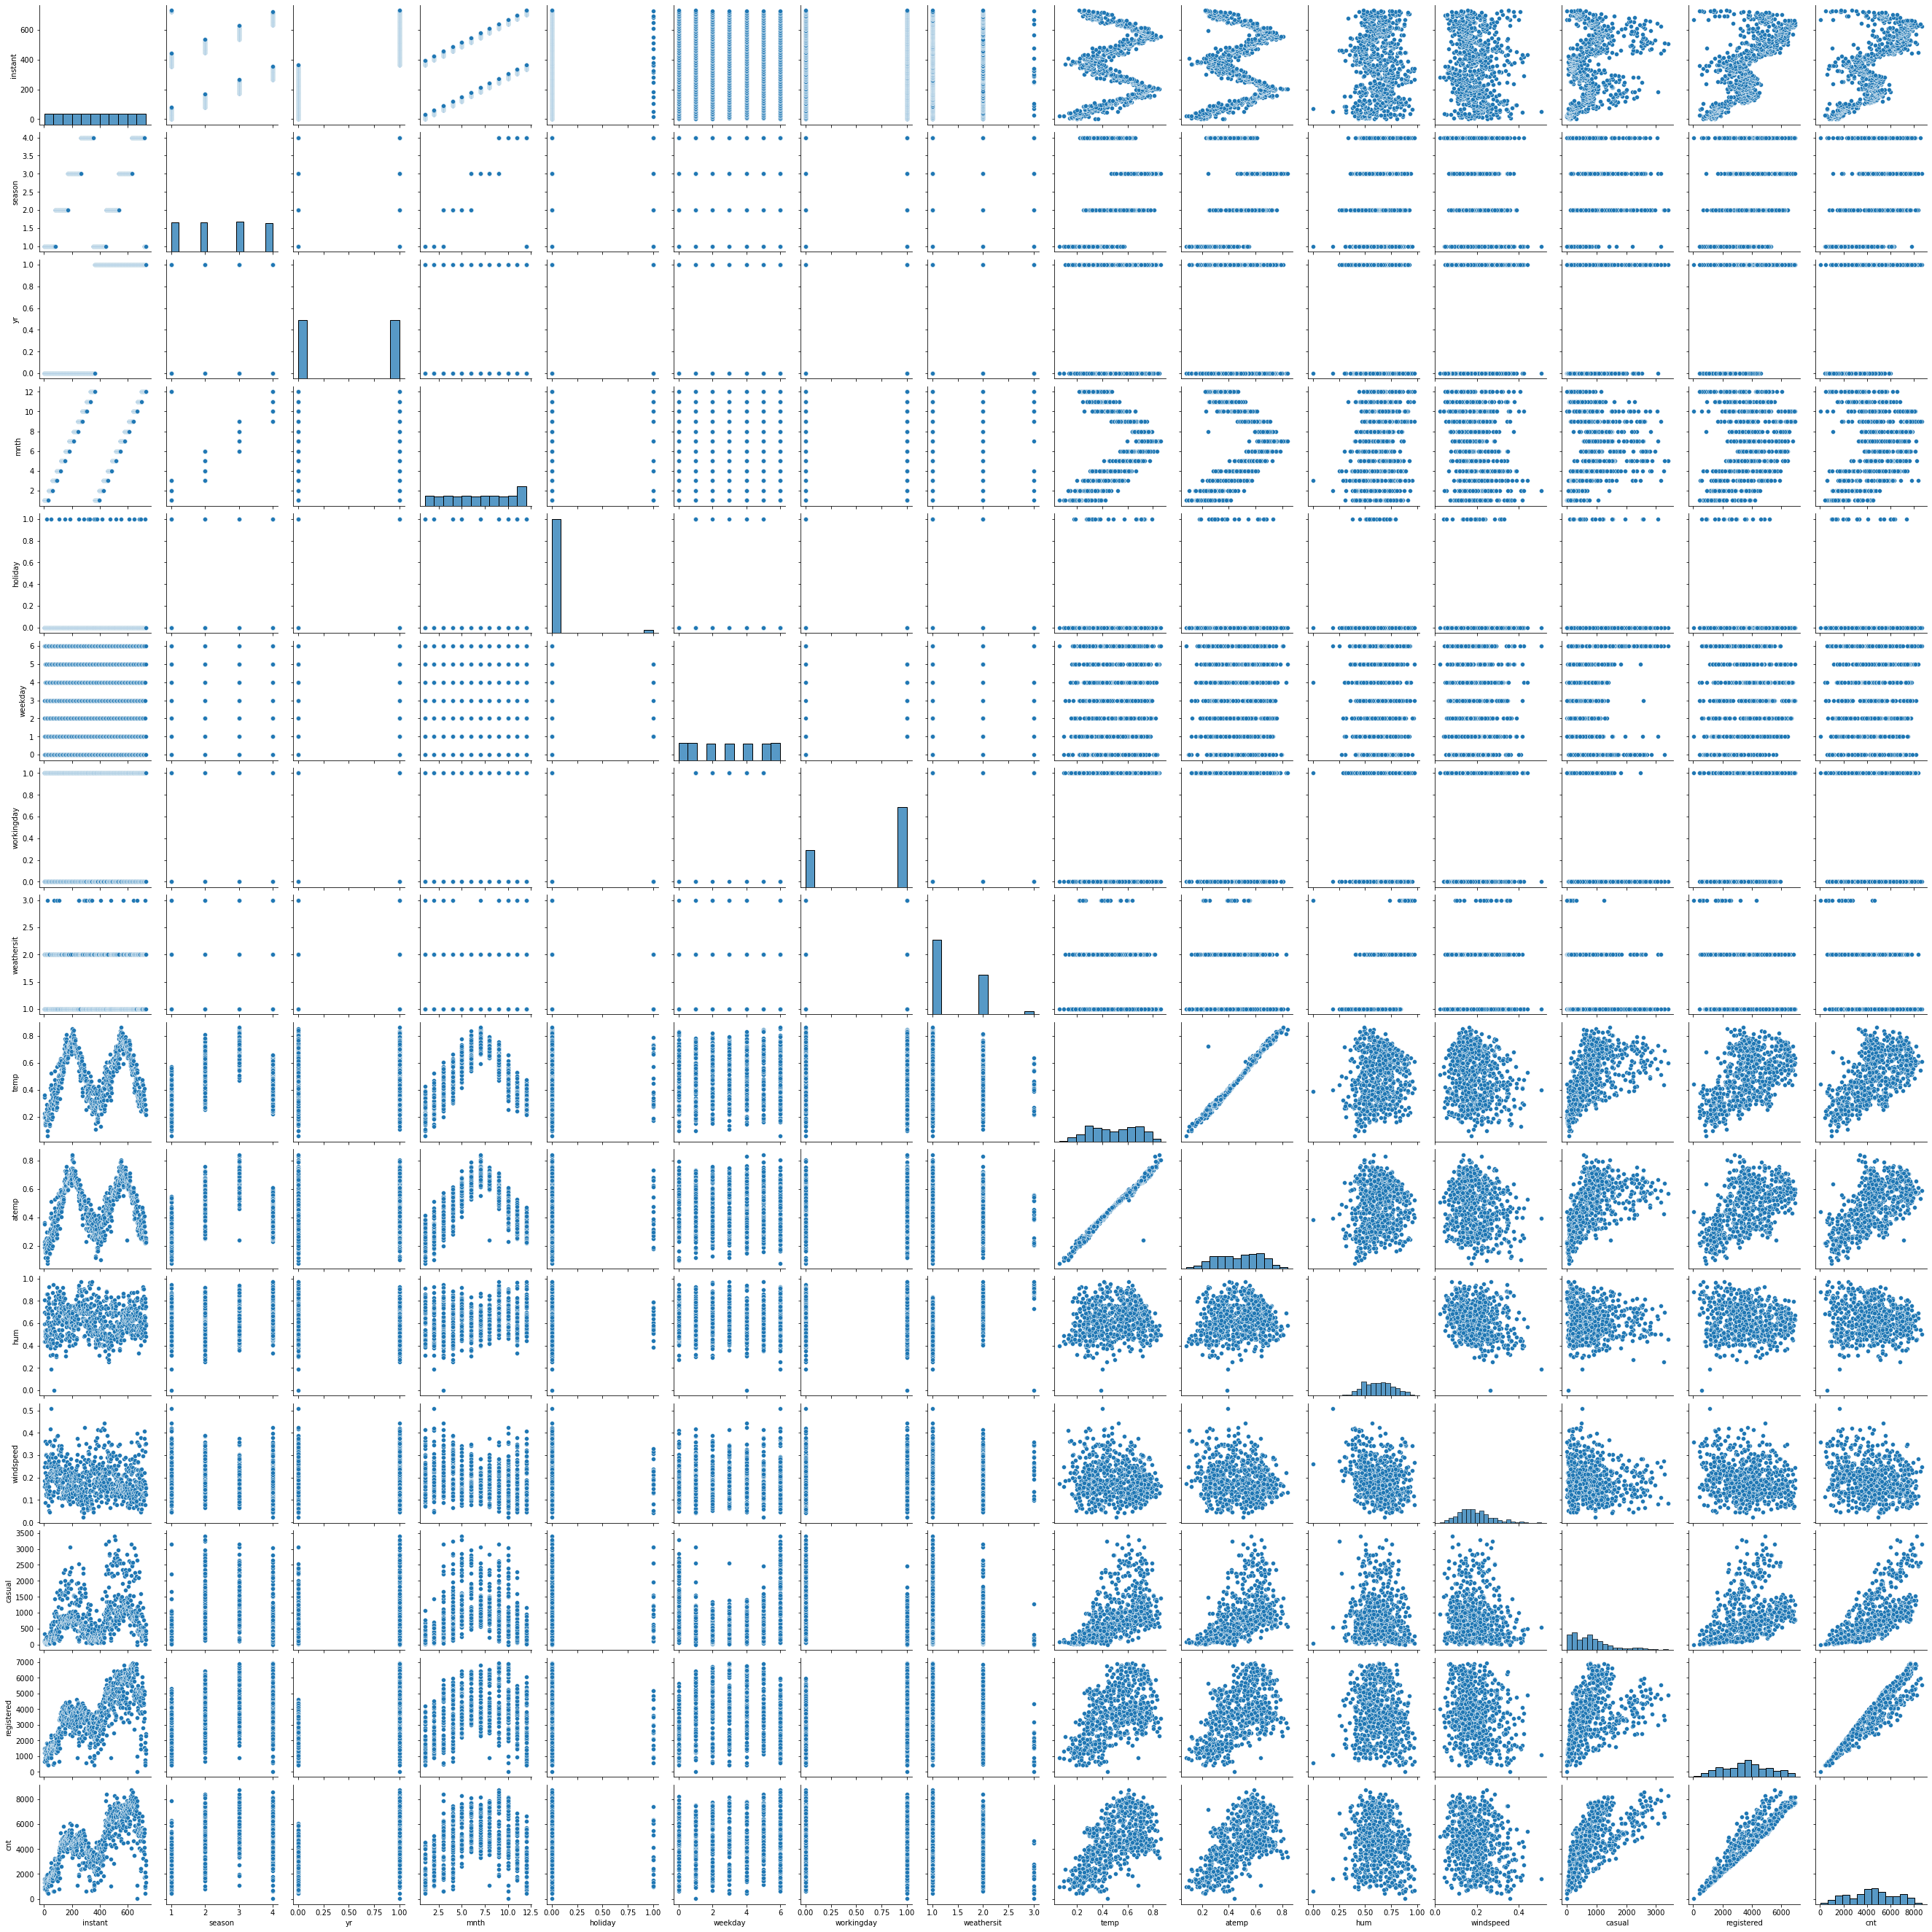

In [47]:
sns.pairplot(df)
plt.show()

In [5]:
corr=df.corr()
corr.nlargest(15,'cnt')['cnt']

cnt           1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
instant       0.628830
temp          0.627494
yr            0.566710
season        0.406100
mnth          0.279977
weekday       0.067443
workingday    0.061156
holiday      -0.068348
hum          -0.100659
windspeed    -0.234545
weathersit   -0.297391
Name: cnt, dtype: float64

In [6]:
X=df[['registered', 'casual', 'atemp', 'instant' , 'temp']]
X.head()

,registered,casual,atemp,instant,temp
0,654,331,0.363625,1,0.344167
1,670,131,0.353739,2,0.363478
2,1229,120,0.189405,3,0.196364
3,1454,108,0.212122,4,0.200000
4,1518,82,0.229270,5,0.226957


In [7]:
y=df['cnt']

In [8]:
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test = train_test_split (X,y, test_size = 0.2 , random_state=1)

In [12]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()

In [15]:
model.fit(X_train,y_train)

LinearRegression()

In [16]:
from sklearn.metrics import r2_score

In [17]:
model.score(X_train,y_train)*100

100.0

In [18]:
model.score(X_test,y_test)*100

100.0

In [22]:
pred=model.predict(X_test)

In [25]:
df=pd.DataFrame({'actual' : y_test , 'estimated' : pred})


In [26]:
df

,actual,estimated
404,3830,3830.0
726,2114,2114.0
159,3915,3915.0
422,4322,4322.0
512,6591,6591.0
...,...,...
675,5686,5686.0
713,5611,5611.0
40,1538,1538.0
432,5382,5382.0


In [27]:
df1=pd.DataFrame({'registered':[1500,250,600],'temp':[0.6325,0.369,0.258],'instant':[1,5,9],'casual':[336,350,500],'attempt':[0.365,0.369,0.255]})
df1

,registered,temp,instant,casual,attempt
0,1500,0.6325,1,336,0.365
1,250,0.3690,5,350,0.369
2,600,0.2580,9,500,0.255


In [28]:
model.predict(df1)

array([1500.6325,  250.369 ,  600.258 ])

In [29]:
a=X.iloc[50:54,:]
a

,registered,casual,atemp,instant,temp
50,1173,639,0.277330,51,0.285217
51,912,195,0.284075,52,0.303333
52,1376,74,0.186033,53,0.182222
53,1778,139,0.245717,54,0.221739


In [30]:
y[50:54]

50    1812
51    1107
52    1450
53    1917
Name: cnt, dtype: int64

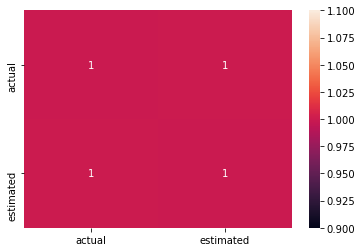

In [37]:
sns.heatmap(df.corr(),annot=True)
plt.show()

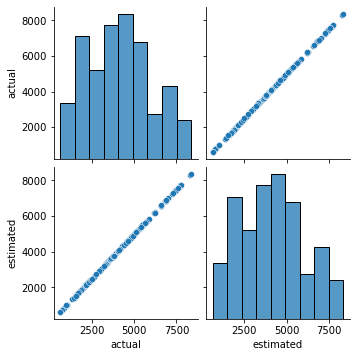

In [42]:
sns.pairplot(df)
plt.show()